# API EXTRACTION

In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.5/339.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

# Spotify credentials
client_id = 'df6fec80f00b41d5a59fd4dd6ff78592'
client_secret = 'a041849e40b547d8bb7aeb2b3e954250'
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Read the CSV
df = pd.read_csv('/content/Main_Tera_3.csv')  # adjust the path if needed

# Prepare results list
results_list = []
for track in df['Track Name']:
    result = sp.search(q=track, type='track', limit=1)
    if result['tracks']['items']:
        track_info = result['tracks']['items'][0]
        images = track_info['album']['images']
        artwork_url = images[0]['url'] if images else None
        results_list.append({'track': track, 'artwork_url': artwork_url})
    else:
        results_list.append({'track': track, 'artwork_url': None})

# Save results
output_df = pd.DataFrame(results_list)
output_df.to_csv('/content/track_artworks.csv', index=False)
print("Results saved as track_artworks.csv")



Results saved as track_artworks.csv


# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET LOADING

In [ ]:
data1 = pd.read_csv('/content/Main_Tera_3.csv')

In [ ]:
try:
    data2 = pd.read_csv('/content/track_artworks.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        data2 = pd.read_csv('/content/track_artworks.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            data2 = pd.read_csv('/content/track_artworks.csv', encoding='ISO-8859-1')
        except Exception as e:
            print(f"Could not decode the file with multiple encodings: {e}")

## MERGING BOTH THE DATASETS

In [ ]:
merged_data = pd.merge(data1, data2, on='Track Name', how='inner')
display(merged_data.head())

,Track URI,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,artwork_url
0,spotify:track:3Z5lD2q7QQXrz0kb4TImfn,Main Tera Main Tera Lofi Flip,Main Tera Main Tera Lofi Flip,Swattrex,12/21/2021,317899.0,NaN,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-18.382,1,0.0395,0.740,0.332000,0.1030,0.354,108.728,4,https://i.scdn.co/image/ab67616d0000b2735e8df3...
1,spotify:track:6bdpj89aYEBjhpsenXAsmO,Enna Sona,OK Jaanu (Original Motion Picture Soundtrack),A.R. Rahman;Arijit Singh,1/4/2017,213632.0,72.0,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-9.875,0,0.0302,0.637,0.000001,0.0976,0.379,100.021,4,https://i.scdn.co/image/ab67616d0000b273007759...
2,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,NaN,NaN,NaN,NaN,NaN,NaN,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-8.343,1,0.0350,0.524,0.000037,0.0921,0.435,117.999,4,https://i.scdn.co/image/ab67616d0000b2739e1cfc...
3,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,NaN,NaN,NaN,NaN,NaN,NaN,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-8.343,1,0.0350,0.524,0.000037,0.0921,0.435,117.999,4,https://i.scdn.co/image/ab67616d0000b2739e1cfc...
4,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,NaN,NaN,NaN,NaN,NaN,NaN,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-8.343,1,0.0350,0.524,0.000037,0.0921,0.435,117.999,4,https://i.scdn.co/image/ab67616d0000b2739e1cfc...


In [ ]:
merged_data.columns

Index(['Track URI', 'Track Name', 'Album Name', 'Artist Name(s)',
       'Release Date', 'Duration (ms)', 'Popularity', 'Explicit', 'Added By',
       'Added At', 'Genres', 'Record Label', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'artwork_url'],
      dtype='object')

In [ ]:
merged_data.shape

(2193, 25)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track URI         2193 non-null   object 
 1   Track Name        672 non-null    object 
 2   Album Name        711 non-null    object 
 3   Artist Name(s)    672 non-null    object 
 4   Release Date      711 non-null    object 
 5   Duration (ms)     672 non-null    float64
 6   Popularity        618 non-null    float64
 7   Explicit          2193 non-null   bool   
 8   Added By          2193 non-null   object 
 9   Added At          2193 non-null   object 
 10  Genres            650 non-null    object 
 11  Record Label      711 non-null    object 
 12  Danceability      2193 non-null   float64
 13  Energy            2193 non-null   float64
 14  Key               2193 non-null   int64  
 15  Loudness          2193 non-null   float64
 16  Mode              2193 non-null   int64  


In [ ]:
merged_data.nunique()

,0
Track URI,678
Track Name,624
Album Name,491
Artist Name(s),547
Release Date,465
Duration (ms),626
Popularity,74
Explicit,2
Added By,1
Added At,306


## DATA CLEANING

In [ ]:
merged_data.isnull().sum()

,0
Track URI,0
Track Name,1521
Album Name,1482
Artist Name(s),1521
Release Date,1482
Duration (ms),1521
Popularity,1575
Explicit,0
Added By,0
Added At,0


In [ ]:
miss_percentage = (merged_data.isnull().sum()/len(merged_data))* 100
miss_percentage

,0
Track URI,0.000000
Track Name,69.357045
Album Name,67.578659
Artist Name(s),69.357045
Release Date,67.578659
Duration (ms),69.357045
Popularity,71.819425
Explicit,0.000000
Added By,0.000000
Added At,0.000000


<Axes: >

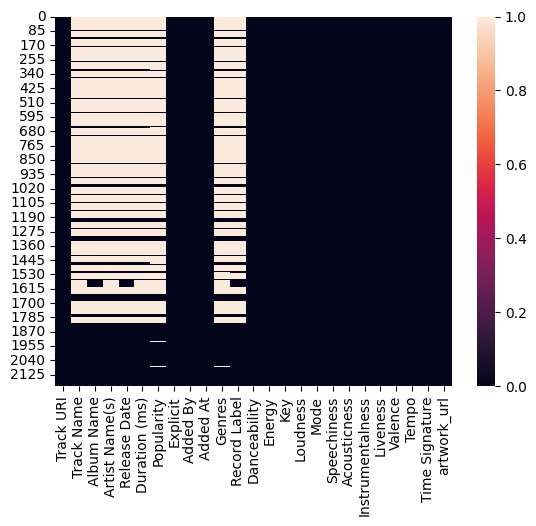

In [ ]:
sns.heatmap(merged_data.isnull())

DELETING ROWS WITH NO TRACK NAME AS IT IS A USELESS TO ANALYSE

In [ ]:
merged_data.dropna(subset=['Track Name'], inplace=True)
display(merged_data.shape)

(672, 25)

<Axes: >

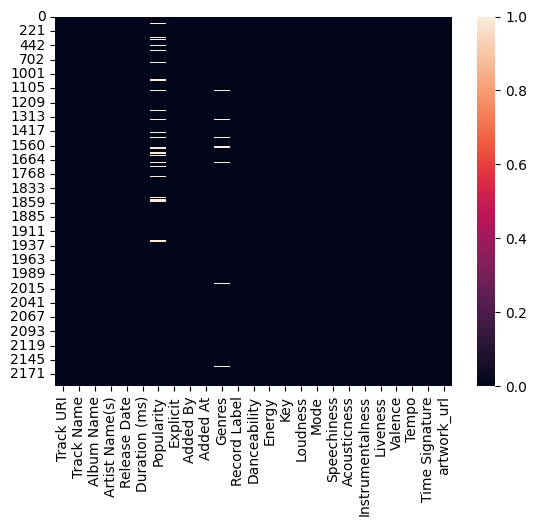

In [ ]:
sns.heatmap(merged_data.isnull())

In [ ]:
merged_data.isnull().sum()

,0
Track URI,0
Track Name,0
Album Name,0
Artist Name(s),0
Release Date,0
Duration (ms),0
Popularity,54
Explicit,0
Added By,0
Added At,0


In [ ]:
merged_data.head()

,Track URI,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,artwork_url
0,spotify:track:3Z5lD2q7QQXrz0kb4TImfn,Main Tera Main Tera Lofi Flip,Main Tera Main Tera Lofi Flip,Swattrex,12/21/2021,317899.0,NaN,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-18.382,1,0.0395,0.740,0.332000,0.1030,0.354,108.728,4,https://i.scdn.co/image/ab67616d0000b2735e8df3...
1,spotify:track:6bdpj89aYEBjhpsenXAsmO,Enna Sona,OK Jaanu (Original Motion Picture Soundtrack),A.R. Rahman;Arijit Singh,1/4/2017,213632.0,72.0,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-9.875,0,0.0302,0.637,0.000001,0.0976,0.379,100.021,4,https://i.scdn.co/image/ab67616d0000b273007759...
80,spotify:track:2tjWCe2W7sgvS3C8NHcdtI,"Duniyaa (From ""Luka Chuppi"")","Duniyaa (From ""Luka Chuppi"")",Akhil;Dhvani Bhanushali;Kunaal Vermaa;Abhijit ...,2/22/2019,222500.0,69.0,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-5.949,0,0.0368,0.699,0.000000,0.1250,0.524,77.170,4,https://i.scdn.co/image/ab67616d0000b2737b93fd...
81,spotify:track:2Fv2injs4qAm8mJBGaxVKU,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","Tujhe Kitna Chahne Lage (From ""Kabir Singh"")",Arijit Singh;Mithoon,5/31/2019,284779.0,78.0,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-7.556,1,0.0366,0.736,0.000000,0.1100,0.306,70.368,4,https://i.scdn.co/image/ab67616d0000b273ba03ff...
82,spotify:track:0l6g8Z8mqGbGXFOjigYetD,Hawayein,Jab Harry Met Sejal (Original Motion Picture S...,Pritam;Arijit Singh,8/3/2017,289999.0,75.0,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-5.576,1,0.0283,0.796,0.000511,0.1270,0.453,125.961,4,https://i.scdn.co/image/ab67616d0000b273a08a13...


In [ ]:
merged_data.dtypes

,0
Track URI,object
Track Name,object
Album Name,object
Artist Name(s),object
Release Date,object
Duration (ms),float64
Popularity,float64
Explicit,bool
Added By,object
Added At,object


In [ ]:
merged_data['Popularity'].mean()

np.float64(55.506472491909385)

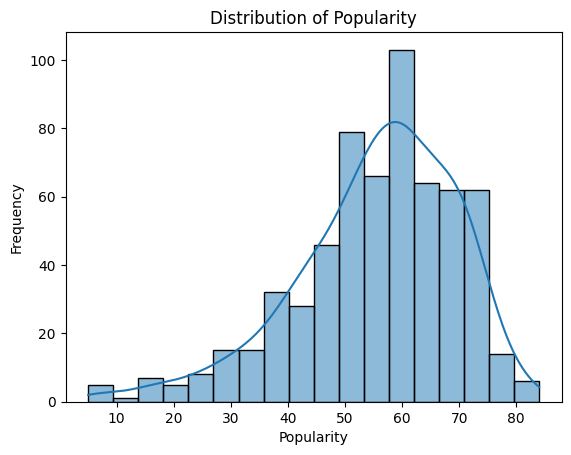

In [ ]:
sns.histplot(data=merged_data, x='Popularity', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_popularity = merged_data['Popularity'].mean()
merged_data['Popularity'].fillna(mean_popularity, inplace=True)

/tmp/ipython-input-208076740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Popularity'].fillna(mean_popularity, inplace=True)


In [ ]:
merged_data.isnull().sum()

,0
Track URI,0
Track Name,0
Album Name,0
Artist Name(s),0
Release Date,0
Duration (ms),0
Popularity,0
Explicit,0
Added By,0
Added At,0


In [ ]:
merged_data.head()

,Track URI,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,artwork_url
0,spotify:track:3Z5lD2q7QQXrz0kb4TImfn,Main Tera Main Tera Lofi Flip,Main Tera Main Tera Lofi Flip,Swattrex,12/21/2021,317899.0,55.506472,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-18.382,1,0.0395,0.740,0.332000,0.1030,0.354,108.728,4,https://i.scdn.co/image/ab67616d0000b2735e8df3...
1,spotify:track:6bdpj89aYEBjhpsenXAsmO,Enna Sona,OK Jaanu (Original Motion Picture Soundtrack),A.R. Rahman;Arijit Singh,1/4/2017,213632.0,72.000000,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-9.875,0,0.0302,0.637,0.000001,0.0976,0.379,100.021,4,https://i.scdn.co/image/ab67616d0000b273007759...
80,spotify:track:2tjWCe2W7sgvS3C8NHcdtI,"Duniyaa (From ""Luka Chuppi"")","Duniyaa (From ""Luka Chuppi"")",Akhil;Dhvani Bhanushali;Kunaal Vermaa;Abhijit ...,2/22/2019,222500.0,69.000000,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-5.949,0,0.0368,0.699,0.000000,0.1250,0.524,77.170,4,https://i.scdn.co/image/ab67616d0000b2737b93fd...
81,spotify:track:2Fv2injs4qAm8mJBGaxVKU,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","Tujhe Kitna Chahne Lage (From ""Kabir Singh"")",Arijit Singh;Mithoon,5/31/2019,284779.0,78.000000,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-7.556,1,0.0366,0.736,0.000000,0.1100,0.306,70.368,4,https://i.scdn.co/image/ab67616d0000b273ba03ff...
82,spotify:track:0l6g8Z8mqGbGXFOjigYetD,Hawayein,Jab Harry Met Sejal (Original Motion Picture S...,Pritam;Arijit Singh,8/3/2017,289999.0,75.000000,False,31oqguuswg2pr7u2qrr6dgxnpr3i,2/26/2022,...,-5.576,1,0.0283,0.796,0.000511,0.1270,0.453,125.961,4,https://i.scdn.co/image/ab67616d0000b273a08a13...


In [ ]:
merged_data['Genres'].head(10)

,Genres
0,lo-fi
1,"tamil pop,kollywood,bollywood,sufi,hindi pop,d..."
80,"punjabi pop,hindi pop,bollywood,desi pop,desi,..."
81,"hindi pop,bollywood,desi,bangla pop"
82,"bollywood,hindi pop,desi,bangla pop"
83,"hindi pop,bollywood,desi,bangla pop,tamil pop,..."
84,"bollywood,hindi pop,gujarati garba,desi,gujara..."
124,"hindi pop,bollywood,desi,bangla pop"
125,"bollywood,hindi pop,kannada pop,tollywood,telu..."
126,"bollywood,hindi pop,desi,sufi"


DELETE THE WHOLE GENRES COLUMN AS MOST OF THE SONGS ARE BOLLYWOOD OTHER GENRES ARE LESSER IN NUMBER

In [ ]:
merged_data.drop('Genres', axis=1, inplace=True)
display(merged_data.columns)

Index(['Track URI', 'Track Name', 'Album Name', 'Artist Name(s)',
       'Release Date', 'Duration (ms)', 'Popularity', 'Explicit', 'Added By',
       'Added At', 'Record Label', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'artwork_url'],
      dtype='object')

<Axes: >

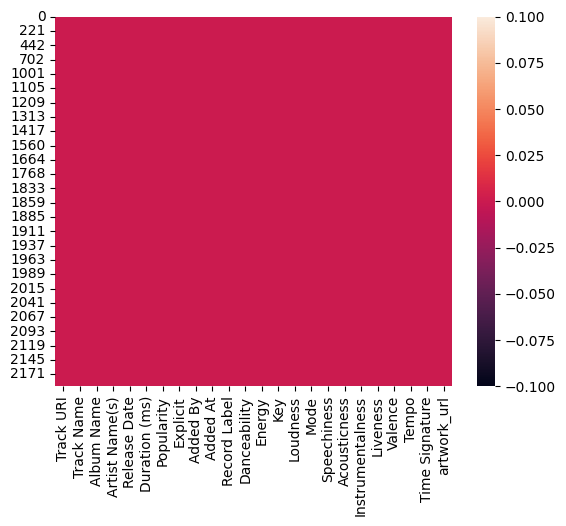

In [ ]:
sns.heatmap(merged_data.isnull())

In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

## THANK YOU